# Notebook for finding interesting data on the JUMP-scope project
- Number of images
- number of sites
- number of cells
- 

In [1]:
import pandas as pd
import os

In [2]:
match_rep_df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/checkpoints/match_rep_df.csv")

In [3]:
# Find the number of images loaded, as dictated by load_data_with_illum.csv

def find_trivia(metadata_df, load_data_path):
    plates = []
    df = metadata_df.copy()

    for root, dirs, files in os.walk(load_data_path):
        for file in files:
            if "load_data.csv" in file:
                path = os.path.join(root, file)
                plate = os.path.split(path)[0].split("/")[-1]
                load_data_df = pd.read_csv(path)
                # Find the number of image columns
                columns = load_data_df.columns.tolist()
                channels = sorted([i for i in columns if "FileName_Orig" in i])
                # Find number of rows
                rows = load_data_df.shape[0]
                # Total number of images = num_rows * num_channels
                num_images = rows * len(channels)
                df.loc[df["Assay_Plate_Barcode"] == plate, "image_num"] = num_images
                # Find total file
                image_size = df.loc[df["Assay_Plate_Barcode"] == plate, "Size_MB"]
                df.loc[df["Assay_Plate_Barcode"] == plate, "total_image_size_GB"] = (image_size * num_images) / 1000
    return df

no_sub = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
]

number_of_images = find_trivia(no_sub, "../jump-scope/load_data_csv/")


In [4]:
# Number of profiles 

match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].shape[0]

54

In [5]:
number_of_images["image_num"].sum()

454638.0

In [7]:
number_of_images["total_image_size_GB"].sum()

6786.468340043271

In [41]:
number_of_images["cell_count"].sum()

41356132

In [42]:
# Total number of sites. This is less accurate since some profiles have 4/5/6 channels and perhaps not all
# images are analysed
number_of_images["sites"].sum() * 384 * 5

441600

In [12]:
# How to calculate unique settings? Take only setting columns and remove duplicates?
# Thus this will find the number of unique setting combinations

setting_cols = [
    "aperture",
    "Magnification",
    "Modality",
    "Binning",
    "Number_of_channels",
    "z_plane",
    "spinning-disc",
    "dry-immersion",
    "vs-brightfield",
    "simultaneous-excitation",
    "sites",
]

setts = number_of_images[setting_cols].drop_duplicates()

print(f"{setts.shape[0]} unique settings used")

23 unique settings used


In [ ]:
numerical_df = to_numerical(setts, str_convert)
numerical_df

numerical_df.apply(np.linalg.norm, axis=1)

In [50]:
import scipy

comparison = scipy.spatial.distance.cdist(numerical_df, numerical_df)

pd.DataFrame(comparison)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,1.000000,2.236068,10.251341,11.184364,11.228980,3.741657,11.405700,10.163784,10.358692,...,10.406849,10.261701,10.454784,14.390622,32.035137,11.225084,11.458730,15.884033,16.257383,32.623649
1,1.000000,0.000000,2.000000,10.202451,11.228980,11.184364,3.872983,11.449454,10.212860,10.406849,...,10.454784,10.310310,10.502500,14.425325,32.050741,11.269539,11.502282,15.915480,16.288109,32.638972
2,2.236068,2.000000,0.000000,10.004499,11.405700,11.361778,4.358899,11.622822,10.406849,10.212860,...,10.261701,10.502500,10.310310,13.269891,31.420535,9.327513,11.674866,14.604879,15.010080,32.020345
3,10.251341,10.202451,10.004499,0.000000,5.477226,5.385165,10.912836,5.916080,2.839454,2.015564,...,2.250000,3.172144,2.462214,8.717798,22.068983,13.679273,6.005206,10.633085,11.183135,22.914242
4,11.184364,11.228980,11.405700,5.477226,0.000000,1.000000,13.003461,2.236068,6.169481,6.485561,...,6.562202,6.329494,6.637959,9.055385,23.896443,15.846845,2.462214,11.272200,11.792476,23.217720
5,11.228980,11.184364,11.361778,5.385165,1.000000,0.000000,13.041856,2.449490,6.250000,6.562202,...,6.637959,6.408003,6.712861,9.110434,23.917358,15.878366,2.657536,11.316470,11.834800,23.239245
6,3.741657,3.872983,4.358899,10.912836,13.003461,13.041856,0.000000,12.809762,10.358692,10.550000,...,10.597287,10.358692,10.550000,15.719097,32.003906,11.832265,13.088258,17.096856,17.558545,33.291178
7,11.405700,11.449454,11.622822,5.916080,2.236068,2.449490,12.809762,0.000000,6.250000,6.562202,...,6.637959,6.250000,6.562202,9.110434,23.917358,16.003828,2.657536,11.316470,12.002604,23.325147
8,10.163784,10.212860,10.406849,2.839454,6.169481,6.250000,10.358692,6.250000,0.000000,2.000000,...,2.236068,1.414214,2.449490,10.865657,22.869248,15.144636,6.324555,12.688578,13.228757,23.979158
9,10.358692,10.406849,10.212860,2.015564,6.485561,6.562202,10.550000,6.562202,2.000000,0.000000,...,1.000000,2.449490,1.414214,9.276988,21.977318,13.760814,6.633250,11.000000,11.618950,23.130067


In [81]:
t = np.where(comparison[0] > 10, comparison[0], 0)

ind = np.argwhere(t==0).reshape(-1)
# ind.reshape(-1)
numerical_df.iloc[ind,:]

comparison[0][ind]



array([0.        , 1.        , 2.23606798, 3.74165739])

aperture                    0.45
Magnification              10.00
Modality                    0.00
Binning                     1.00
Number_of_channels          6.00
z_plane                     1.00
spinning-disc               1.00
dry-immersion               0.00
vs-brightfield              0.00
simultaneous-excitation     0.00
sites                       4.00
Name: 2, dtype: float64


,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,euclidean_distance
42,1.00,20,1,1,5,1,0.0,1,0.0,0.0,3,0.000000
26,1.00,20,0,1,5,1,0.0,1,0.0,0.0,3,1.000000
74,1.00,20,1,2,5,1,0.0,1,0.0,0.0,3,1.000000
58,1.00,20,0,2,5,1,0.0,1,0.0,0.0,3,1.414214
50,1.00,20,1,1,5,3,0.0,1,0.0,0.0,3,2.000000
34,1.00,20,0,1,5,3,0.0,1,0.0,0.0,3,2.236068
82,1.00,20,1,2,5,3,0.0,1,0.0,0.0,3,2.236068
66,1.00,20,0,2,5,3,0.0,1,0.0,0.0,3,2.449490
6,0.75,20,0,1,6,3,1.0,0,0.0,0.0,4,3.010399
20,0.75,20,1,1,4,1,0.0,0,0.0,0.0,9,6.169481


In [51]:
setts

,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,0.45,10,Confocal,1,6,1,no,dry,NaN,NaN,4
2,0.45,10,Confocal,1,6,1,yes,dry,NaN,NaN,4
4,0.45,10,Confocal,1,6,3,yes,dry,NaN,NaN,4
6,0.75,20,Confocal,1,6,3,yes,dry,NaN,NaN,4
8,0.75,20,Confocal,1,6,1,no,dry,NaN,NaN,9
10,0.75,20,Confocal,1,6,1,yes,dry,NaN,NaN,9
12,0.45,10,Widefield,1,4,1,NaN,dry,NaN,NaN,1
20,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9
26,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3
34,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3


<AxesSubplot:>

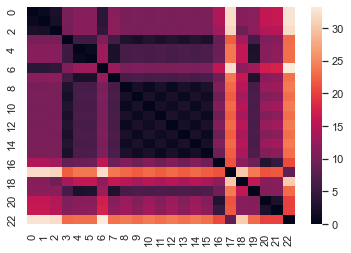

In [53]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

sns.heatmap(comparison)

/Users/ctromans/miniconda3/envs/jump-scope/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


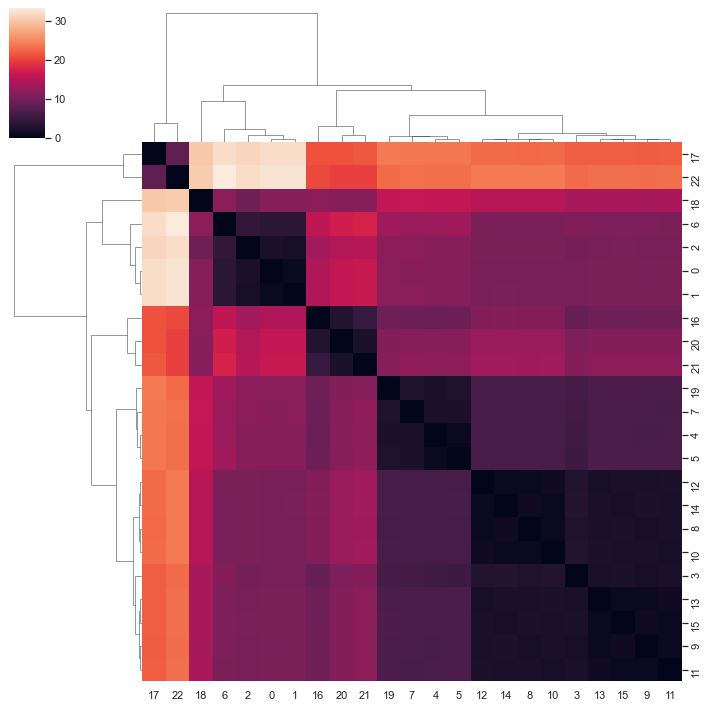

In [54]:
sns.clustermap(comparison)

In [31]:
setts.replace({"Modality": "Confocal"}, 324234534)

,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,0.45,10,324234534,1,6,1,no,dry,NaN,NaN,4
2,0.45,10,324234534,1,6,1,yes,dry,NaN,NaN,4
4,0.45,10,324234534,1,6,3,yes,dry,NaN,NaN,4
6,0.75,20,324234534,1,6,3,yes,dry,NaN,NaN,4
8,0.75,20,324234534,1,6,1,no,dry,NaN,NaN,9
10,0.75,20,324234534,1,6,1,yes,dry,NaN,NaN,9
12,0.45,10,Widefield,1,4,1,NaN,dry,NaN,NaN,1
20,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9
26,1.00,20,324234534,1,5,1,NaN,water,NaN,NaN,3
34,1.00,20,324234534,1,5,3,NaN,water,NaN,NaN,3


In [22]:
setts

,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,0.45,10,Confocal,1,6,1,no,dry,NaN,NaN,4
2,0.45,10,Confocal,1,6,1,yes,dry,NaN,NaN,4
4,0.45,10,Confocal,1,6,3,yes,dry,NaN,NaN,4
6,0.75,20,Confocal,1,6,3,yes,dry,NaN,NaN,4
8,0.75,20,Confocal,1,6,1,no,dry,NaN,NaN,9
10,0.75,20,Confocal,1,6,1,yes,dry,NaN,NaN,9
12,0.45,10,Widefield,1,4,1,NaN,dry,NaN,NaN,1
20,0.75,20,Widefield,1,4,1,NaN,dry,NaN,NaN,9
26,1.00,20,Confocal,1,5,1,NaN,water,NaN,NaN,3
34,1.00,20,Confocal,1,5,3,NaN,water,NaN,NaN,3


<AxesSubplot:ylabel='Count'>

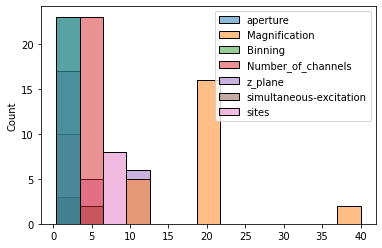

In [19]:
# Create a setting heatmap

import seaborn as sns

setts.drop("Modality", axis=1)

sns.histplot(setts)